# 3. Noise Filtering

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Noise, Cross-correlation, Convolution

In [45]:
def create_salt_pepper(img):
    pass

def create_impulse_noise(img):
    pass

def create_gaussian_noise(img):
    pass

In [44]:
def cross_correlation(image, mask):
    image_h, image_w = image.shape
    mask_h, mask_w = mask.shape
    mask_h = (mask_h - 1) // 2
    mask_w = (mask_w - 1) // 2
    result = np.zeros_like(image, dtype=float)

    for j in range(mask_h, image_h - mask_h):
        for i in range(mask_w, image_w - mask_w):
            for v in range(-mask_h, mask_h + 1):
                for u in range(-mask_w, mask_w + 1):
                    result[j][i] += mask[v][u] * image[j + v][i + u]
    
    return result

def convolution(image, mask):
    image_h, image_w = image.shape
    mask_h, mask_w = mask.shape
    mask_h = (mask_h - 1) // 2
    mask_w = (mask_w - 1) // 2
    result = np.zeros_like(image, dtype=float)

    for j in range(mask_h, image_h - mask_h):
        for i in range(mask_w, image_w - mask_w):
            for v in range(-mask_h, mask_h + 1):
                for u in range(-mask_w, mask_w + 1):
                    result[j][i] += mask[v][u] * image[j - v][i - u]
    
    return result

2. Kernel

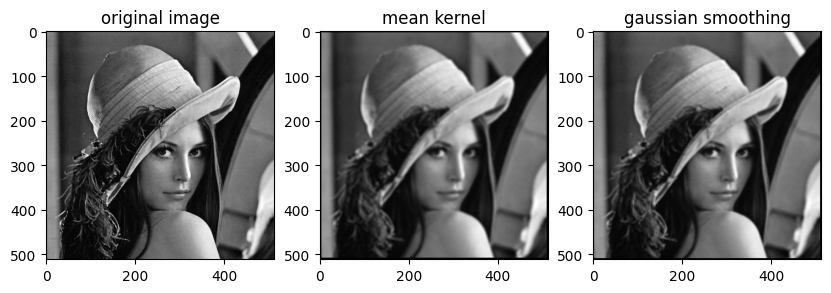

In [47]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

mean_kernel = np.full((7, 7), 1 / 49)
gaussian_kernel = (1 / 74) * np.array([[1, 2, 3, 2, 1],
                                       [2, 4, 5, 4, 2],
                                       [3, 5, 6, 5, 3],
                                       [2, 4, 5, 4, 2],
                                       [1, 2, 3, 2, 1]])

img_mean = convolution(img, mean_kernel)
img_gaussian = convolution(img, gaussian_kernel)

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('mean kernel')
plt.imshow(img_mean, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('gaussian smoothing')
plt.imshow(img_gaussian, cmap='gray')

plt.show()